<a href="https://colab.research.google.com/github/VNKT777/MNIST_Handwriting_Recognition/blob/main/MNIST_Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy

In [2]:
#Loading the MNIST Dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

x_train = x_train.astype("Float32")
x_test = x_test.astype("Float32")

x_train /= 255
x_test /= 255

y_test = np_utils.to_categorical(y_test)
y_train =  np_utils.to_categorical(y_train)


11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]


In [3]:
#Training the Model

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [4]:
batch_size = 32
epochs = 10
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print("Test Loss :",score[0])
print("Test Accucracy :",score[1])

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.8341 - accuracy: 0.7440 - val_loss: 0.1715 - val_accuracy: 0.9478
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2138 - accuracy: 0.9350 - val_loss: 0.1181 - val_accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1628 - accuracy: 0.9482 - val_loss: 0.0993 - val_accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1280 - accuracy: 0.9611 - val_loss: 0.0784 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1040 - accuracy: 0.9683 - val_loss: 0.0718 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0907 - accuracy: 0.9726 - val_loss: 0.0616 - val_accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0821 - accuracy: 0.9743 - val_loss: 0.0584 - val_accuracy



```
# This is formatted as code
```

# Output

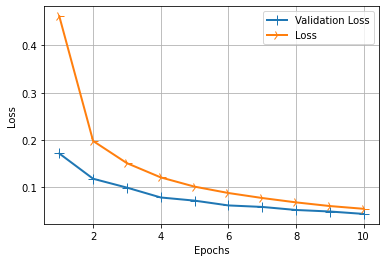

In [5]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_val = history_dict['loss']
val_loss_val = history_dict['val_loss']

epochs = range(1,len(loss_val)+1)

line1 = plt.plot(epochs,val_loss_val,label='Validation Loss')
line2 = plt.plot(epochs,loss_val,label='Loss')

plt.setp(line1,linewidth=2,marker='+',markersize=10)
plt.setp(line2,linewidth=2,marker='4',markersize=10)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()